In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [28]:

!pip3 install xgboost


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 6.1 MB/s eta 0:00:00


In [3]:
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [5]:
df = pd.read_csv('glass.csv', names=column_names)

In [6]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [8]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df.nunique()

Id               214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

In [10]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

In [12]:
df.nunique().to_frame('check')

,check
Id,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [13]:
# as we can see id has same leth as data dropping it

In [14]:
df.drop('Id',axis=1,inplace=True)

In [15]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<AxesSubplot:>

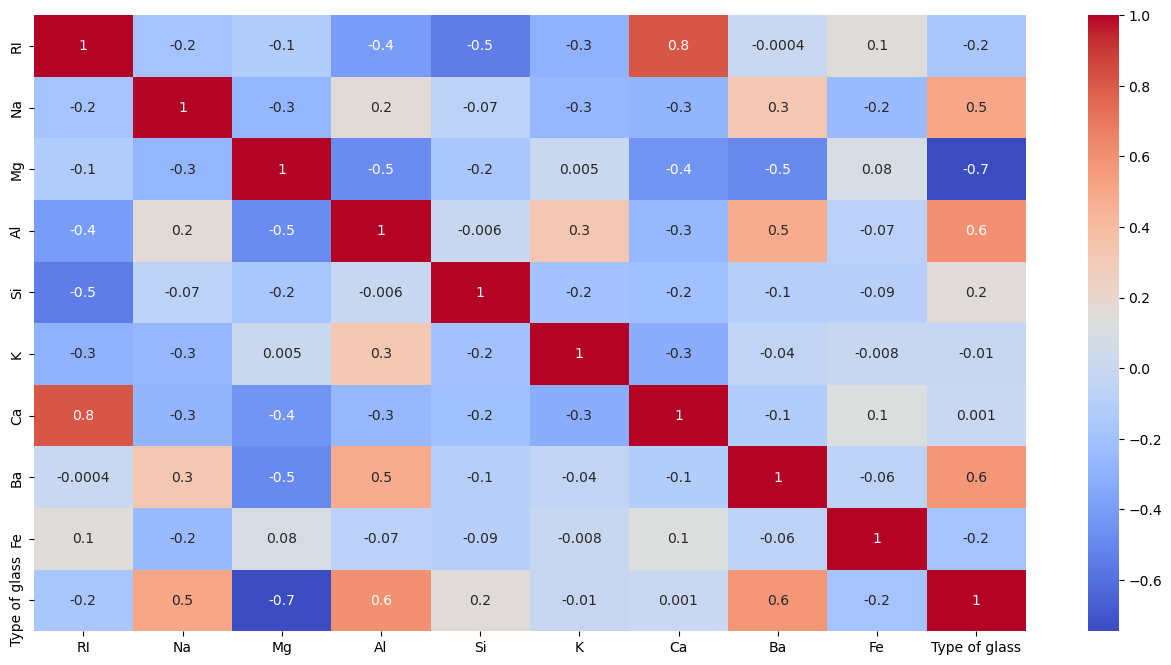

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.1g', cmap='coolwarm')

In [17]:
df['Type of glass'] = [1 if x>=5 else 0 for x in df['Type of glass']]

In [18]:
df['Type of glass']

0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Type of glass, Length: 214, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [20]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
Scaler =  StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test,predictions)

0.9154929577464789

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        51
           1       0.89      0.80      0.84        20

    accuracy                           0.92        71
   macro avg       0.91      0.88      0.89        71
weighted avg       0.91      0.92      0.91        71



In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [30]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    predictions = LR.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print('max acc is',maxaccu,'on r state',maxrs)


max acc is 0.9859154929577465 on r state 52


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=maxrs)

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test,predictions)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.94      1.00      0.97        17

    accuracy                           0.99        71
   macro avg       0.97      0.99      0.98        71
weighted avg       0.99      0.99      0.99        71

[[53  1]
 [ 0 17]]


0.9859154929577465

In [35]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        54
           1       0.00      0.00      0.00        17

    accuracy                           0.76        71
   macro avg       0.38      0.50      0.43        71
weighted avg       0.58      0.76      0.66        71

[[54  0]
 [17  0]]


0.7605633802816901

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier()
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
accuracy_score(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
accuracy_score(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.93      0.82      0.87        17

    accuracy                           0.94        71
   macro avg       0.94      0.90      0.92        71
weighted avg       0.94      0.94      0.94        71

[[53  1]
 [ 3 14]]


0.9436619718309859

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
accuracy_score(y_test,y_pred2 )
print(classification_report(y_test,y_pred2 ))
print(confusion_matrix(y_test,y_pred2 ))
accuracy_score(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       1.00      0.76      0.87        17

    accuracy                           0.94        71
   macro avg       0.97      0.88      0.92        71
weighted avg       0.95      0.94      0.94        71

[[54  0]
 [ 4 13]]


0.9436619718309859

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
accuracy_score(y_test,y_pred3 )
print(classification_report(y_test,y_pred3 ))
print(confusion_matrix(y_test,y_pred3))
accuracy_score(y_test,y_pred3)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.88      0.94        17

    accuracy                           0.97        71
   macro avg       0.98      0.94      0.96        71
weighted avg       0.97      0.97      0.97        71

[[54  0]
 [ 2 15]]


0.971830985915493

In [39]:
from xgboost import XGBClassifier
classifier4 = XGBClassifier()
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)
accuracy_score(y_test, y_pred4)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
accuracy_score(y_test,y_pred4)

[[54  0]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.88      0.94        17

    accuracy                           0.97        71
   macro avg       0.98      0.94      0.96        71
weighted avg       0.97      0.97      0.97        71



0.971830985915493

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [42]:
logmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [46]:
grid_search = GridSearchCV(logmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [47]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [48]:
best_params

{'C': 10, 'penalty': 'l2'}

In [49]:
best_model

LogisticRegression(C=10)

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
fpr, tpr, thresholds

(array([0.        , 0.01851852, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [53]:
auc_value = auc(fpr, tpr)
auc_value

0.9907407407407408

In [55]:
print("Best Hyperparameters:", best_params)
print("AUC:", auc_value)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
AUC: 0.9907407407407408


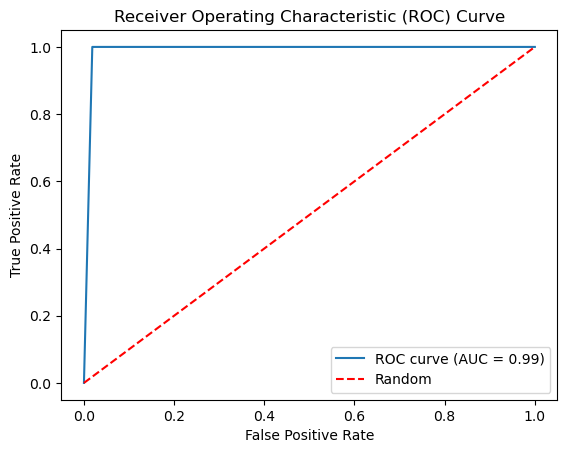

In [56]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [58]:
md = pd.DataFrame({'all m':['logmodel','classifier','classifier1','classifier2','classifier3','classifier4'],
             'acc score' :[accuracy_score(y_test,predictions)*100,
                         accuracy_score(y_test, y_pred)*100,
                         accuracy_score(y_test, y_pred1)*100,
                         accuracy_score(y_test, y_pred2)*100,
                         accuracy_score(y_test, y_pred3)*100,
                         accuracy_score(y_test, y_pred4)*100]})

<AxesSubplot:xlabel='all m', ylabel='acc score'>

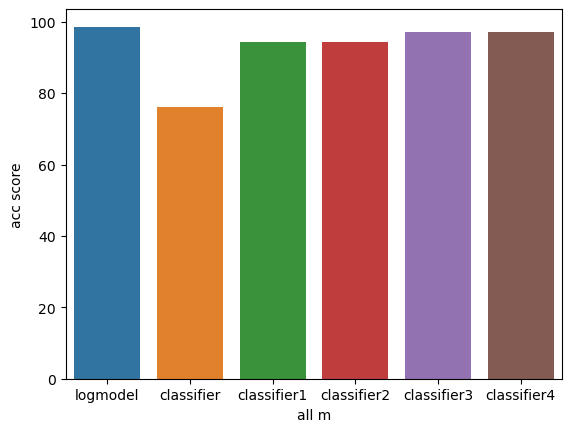

In [59]:
sns.barplot(md['all m'],md['acc score'])

In [60]:
import joblib

In [61]:
joblib.dump(logmodel,'glass')

['glass']

In [ ]:
#logistic regression and xg boost is best model